# Problem Statement:

This project aims to develop a Credit Risk Prediction Model using Machine Learning to classify loan applicants as high or low risk based on historical data.

Banks and financial institutions need a robust risk assessment system to evaluate the probability of default before approving a loan. Traditional credit scoring methods may fail to capture complex patterns in financial behavior, leading to inaccurate assessments. An ML-based credit risk prediction model can help:

- Improve the accuracy of risk assessment.
- Minimize financial losses by identifying high-risk applicants.
- Enable better decision-making for loan approvals.

## Feature Descriptions
person_age: Age of the individual applying for the loan.

person_income: Annual income of the individual.

person_home_ownership: Type of home ownership of the individual:

- rent: The individual is currently renting a property.
- mortgage: The individual has a mortgage on the property they own.
- own: The individual owns their home outright.
- other: Other categories of home ownership that may be specific to the dataset.

person_emp_length: Employment length of the individual in years.

loan_intent: The intent behind the loan application.

loan_grade: The grade assigned to the loan based on the creditworthiness of the borrower:

A: The borrower has a high creditworthiness, indicating low risk.

B: The borrower is relatively low-risk, but not as creditworthy as Grade A.

C: The borrower's creditworthiness is moderate.

D: The borrower is considered to have higher risk compared to previous grades.

E: The borrower's creditworthiness is lower, indicating a higher risk.

F: The borrower poses a significant credit risk.

G: The borrower's creditworthiness is the lowest, signifying the highest risk.

loan_amnt: The loan amount requested by the individual.

loan_int_rate: The interest rate associated with the loan.

loan_status: Loan status, where 0 indicates non-default and 1 indicates default.

  0: Non-default - The borrower successfully repaid the loan as agreed, and there was no default.

  1: Default - The borrower failed to repay the loan according to the agreed-upon terms and defaulted on the loan.

loan_percent_income: The percentage of income represented by the loan amount.

cb_person_default_on_file: Historical default of the individual as per credit bureau records.

Y: The individual has a history of defaults on their credit file.

N: The individual does not have any history of defaults.

cb_preson_cred_hist_length: The length of credit history for the individual.

In [58]:
# data
import pandas as pd
import numpy as np

#Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [4]:
df= pd.read_csv("/content/drive/MyDrive/credit_risk_dataset.csv.zip")

In [5]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [6]:
df.shape

(32581, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [8]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [9]:
# Checking null values in percentage if any

df.isnull().sum()/df.shape[0]*100

,0
person_age,0.000000
person_income,0.000000
person_home_ownership,0.000000
person_emp_length,2.747000
loan_intent,0.000000
loan_grade,0.000000
loan_amnt,0.000000
loan_int_rate,9.563856
loan_status,0.000000
loan_percent_income,0.000000


In [10]:
# Checking unique values

df.nunique()

,0
person_age,58
person_income,4295
person_home_ownership,4
person_emp_length,36
loan_intent,6
loan_grade,7
loan_amnt,753
loan_int_rate,348
loan_status,2
loan_percent_income,77


In [11]:
data=df.copy()

# Converting loan_status into categorical column in order to do a better visualisation

data['loan_status']=data['loan_status'].astype('object')

In [12]:
# Checking value counts of categorical columns
cat_column= data.select_dtypes(include='object')
for col in cat_column:
  print(data[col].value_counts())
  print()



person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64

loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64

loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: count, dtype: int64

loan_status
0    25473
1     7108
Name: count, dtype: int64

cb_person_default_on_file
N    26836
Y     5745
Name: count, dtype: int64



In [13]:
# Checking duplicates

df.duplicated().sum()

165

# EDA

## Univariate Analysis

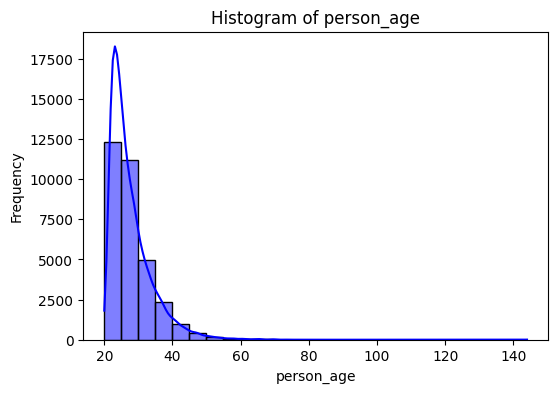

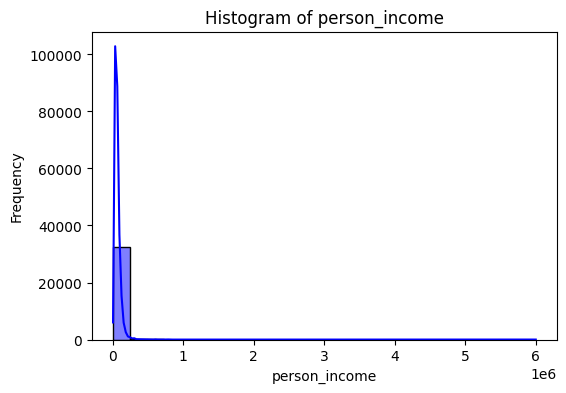

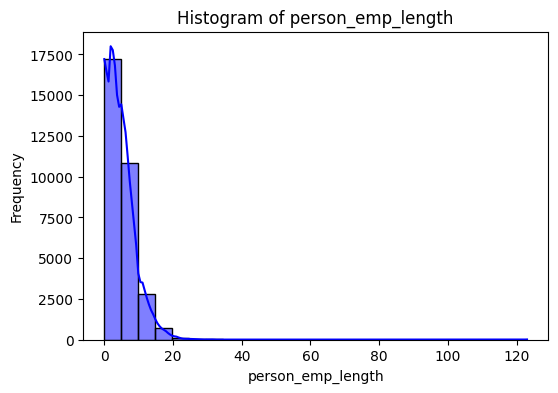

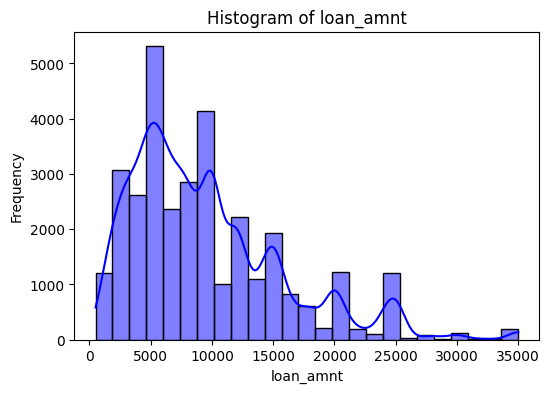

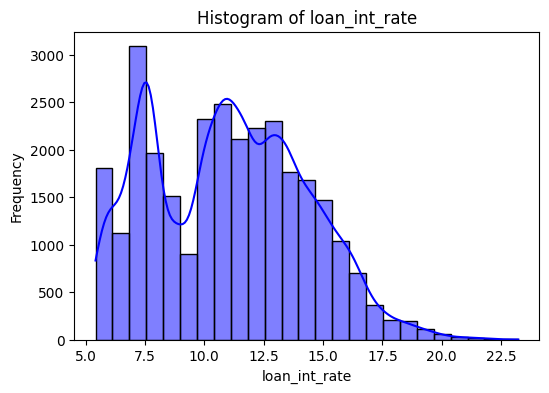

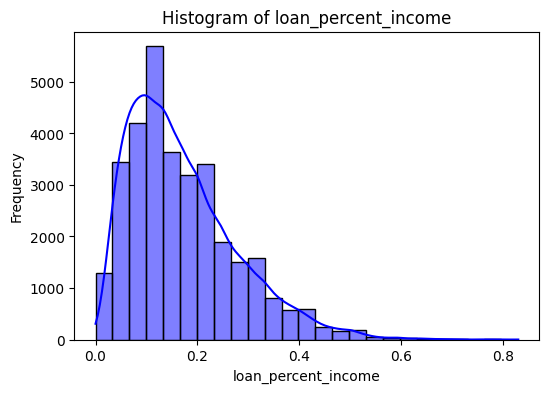

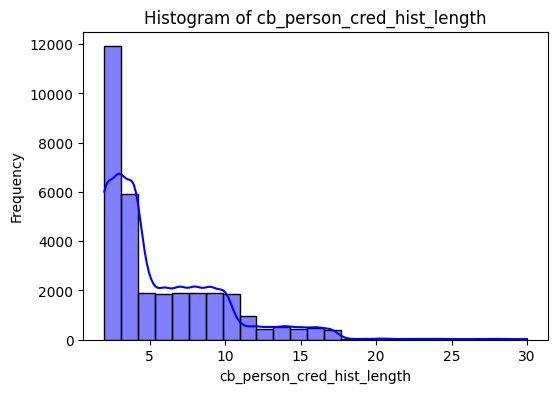

In [14]:
# For numerical columns
num_column= data.select_dtypes(include='number')
for col in num_column:
  plt.figure(figsize=(6,4))
  sns.histplot(data[col], bins=25, kde=True, color="blue")
  plt.title(f"Histogram of {col}")
  plt.xlabel(f"{col}")
  plt.ylabel("Frequency")
  plt.show()

**0Observation**: Data is very skewed in Numerical columns. Mostly taken loan amount by people fall in range on 5000 to 10000 and their employment length is mostly between 0 to 10 years with very less income which lies within 1 million yearly. Percentage of loan mostly lies within 0.1 to 0.2 %

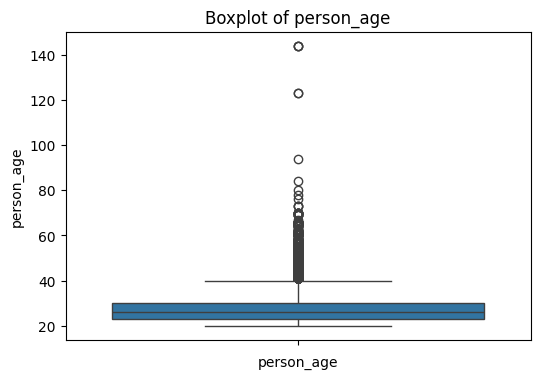

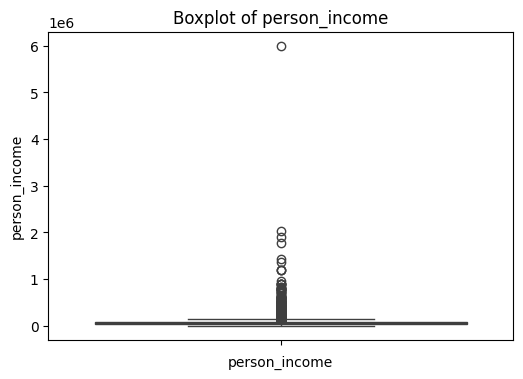

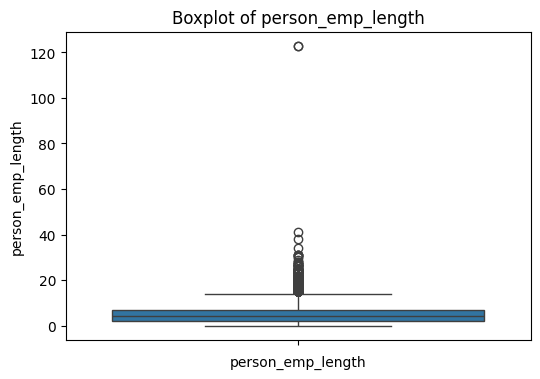

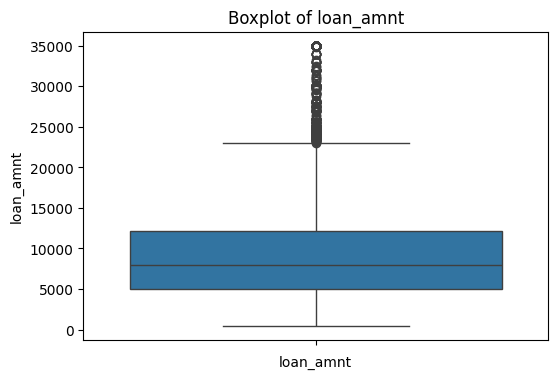

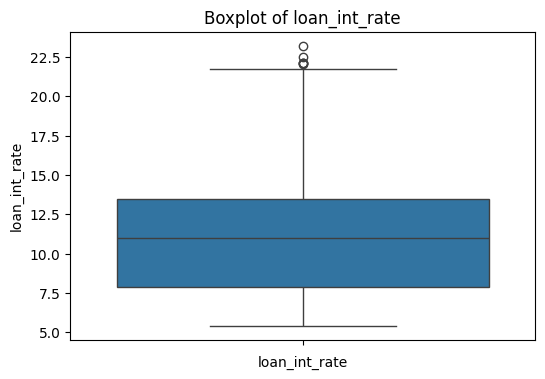

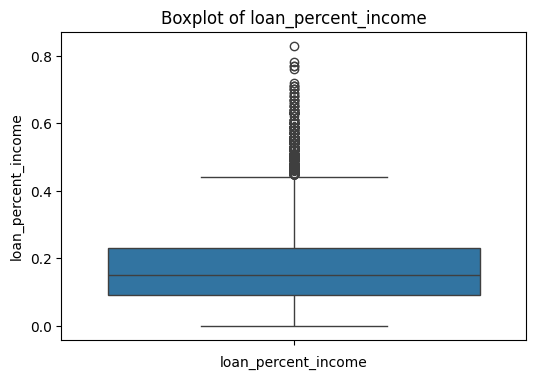

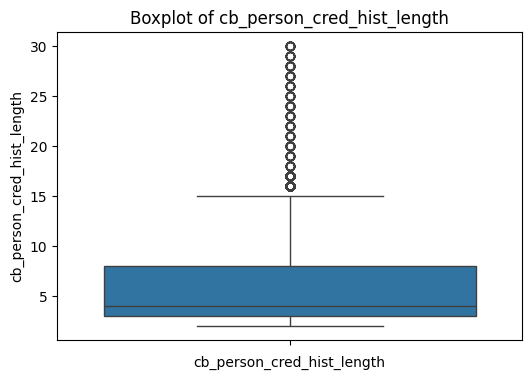

In [15]:
# Checking outlier in Numerical columns using boxplot

for col in num_column:
  plt.figure(figsize=(6,4))
  sns.boxplot(data[col])
  plt.title(f"Boxplot of {col}")
  plt.xlabel(f"{col}")


**Observation**: There are lots of Outliers in Numerical columns

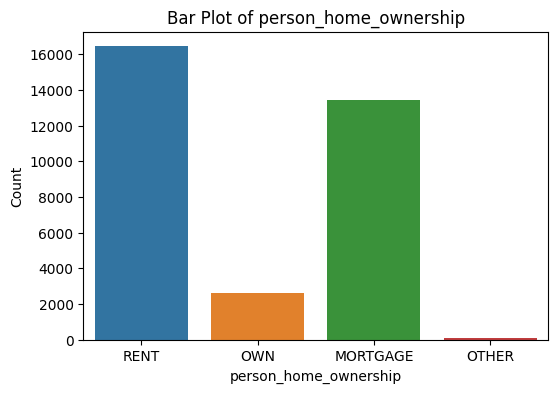

In [16]:
# For categorical column

plt.figure(figsize=(6,4))
sns.countplot(x=df['person_home_ownership'], hue= df['person_home_ownership'])
plt.title("Bar Plot of person_home_ownership")
plt.xlabel("person_home_ownership")
plt.ylabel("Count")
plt.show()

**Observation**: Loan is mostly taken by people who are either on rent or on Mortgage

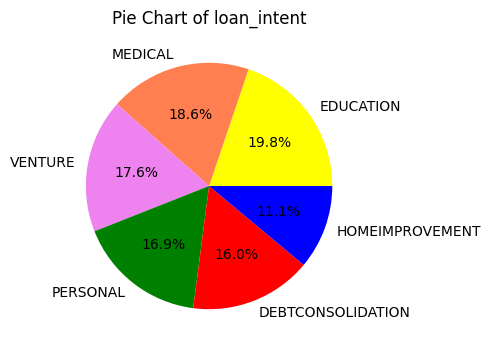

In [17]:
plt.figure(figsize=(6,4))
df['loan_intent'].value_counts().plot.pie(autopct="%1.1f%%", colors=['yellow', 'coral','violet','green','red','blue'])
plt.title("Pie Chart of loan_intent")
plt.ylabel("")
plt.show()

**Observation:**: Among all types of loan, People take loan mostly for Education and for medical reasons

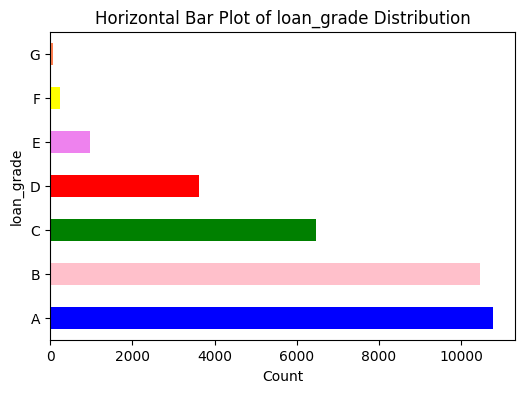

In [18]:
plt.figure(figsize=(6,4))
df['loan_grade'].value_counts().plot(kind='barh', color=['blue', 'pink','green','red','violet','yellow','coral'])
plt.title("Horizontal Bar Plot of loan_grade Distribution")
plt.xlabel("Count")
plt.ylabel("loan_grade")
plt.show()

**Observation**: People at higher risky of doing farud i.e D,E,F,G are less

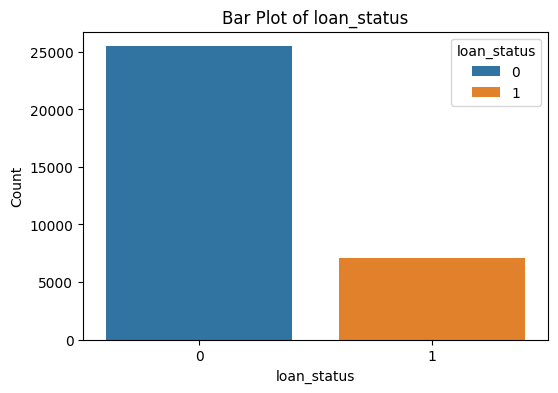

In [19]:
plt.figure(figsize=(6,4))
sns.countplot(x=data['loan_status'], hue= data['loan_status'])
plt.title("Bar Plot of loan_status")
plt.xlabel("loan_status")
plt.ylabel("Count")
plt.show()

**Observation**: Defaulters count for loan status is very less

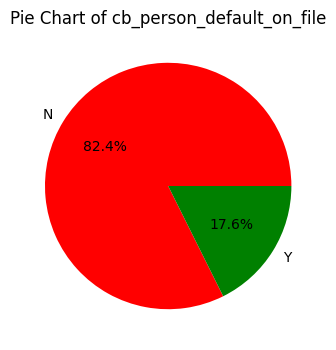

In [20]:
plt.figure(figsize=(6,4))
df['cb_person_default_on_file'].value_counts().plot.pie(autopct="%1.1f%%", colors=['red','green'])
plt.title("Pie Chart of cb_person_default_on_file")
plt.ylabel("")
plt.show()

**Observation**: 82% people are not on defaulters file.

## Bivariate analysis

In [21]:
# Numerical vs Numerical

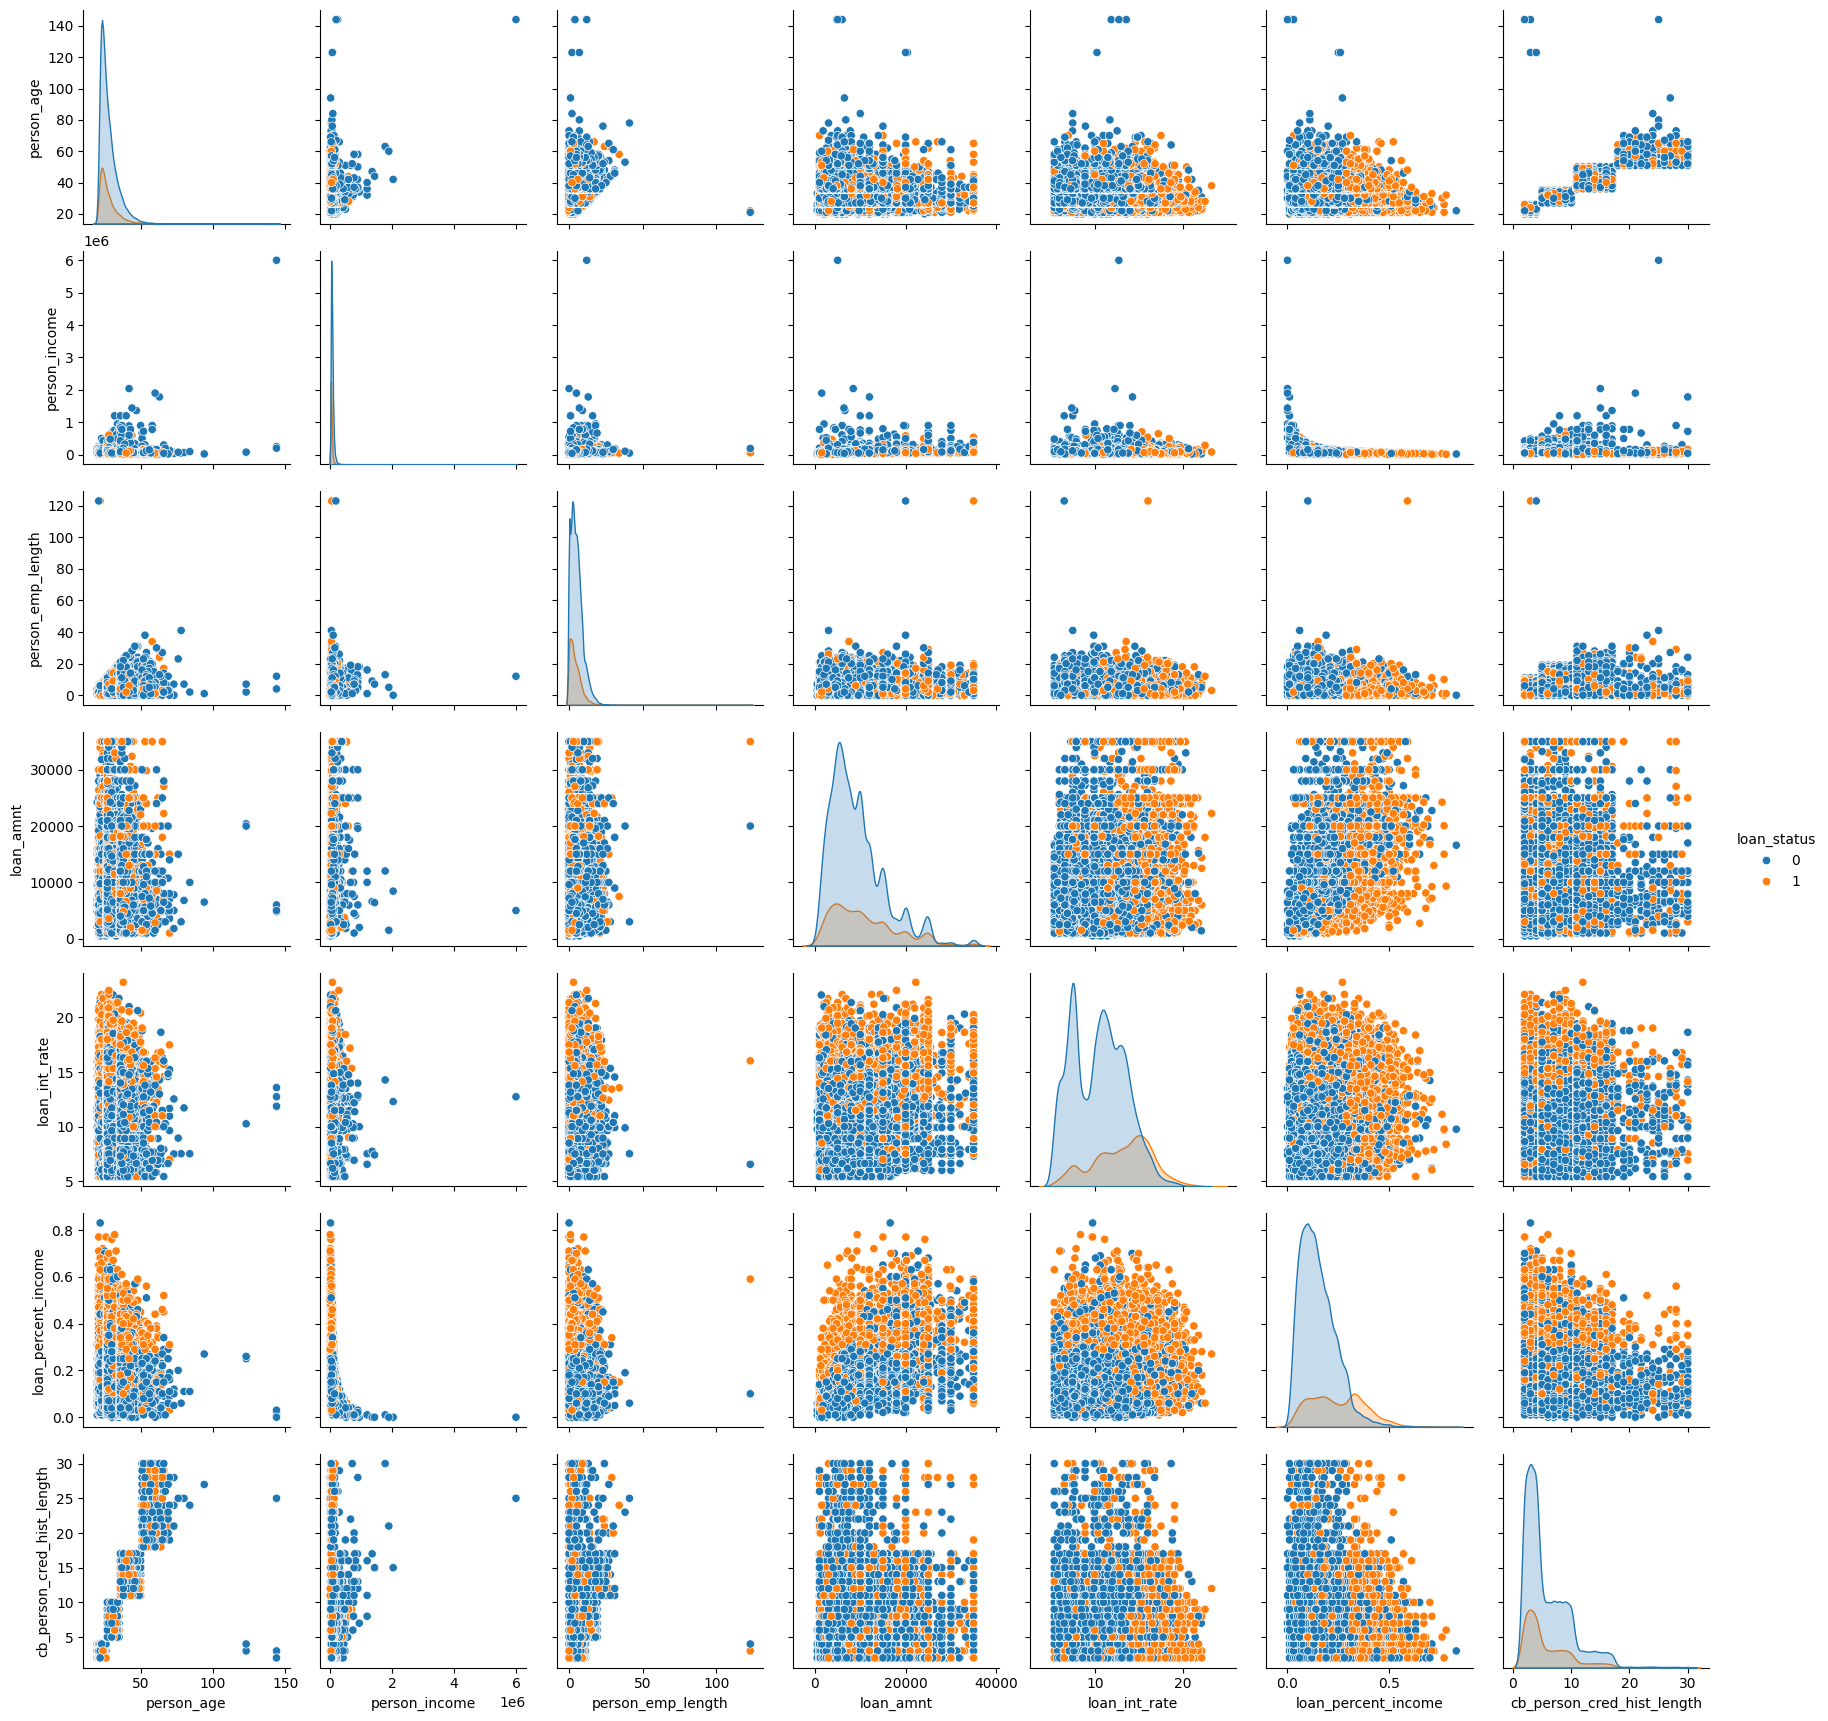

In [22]:
# Getting scatter plot to check relation ship between two numerical variables using pairplot

sns.pairplot(df, hue='loan_status')

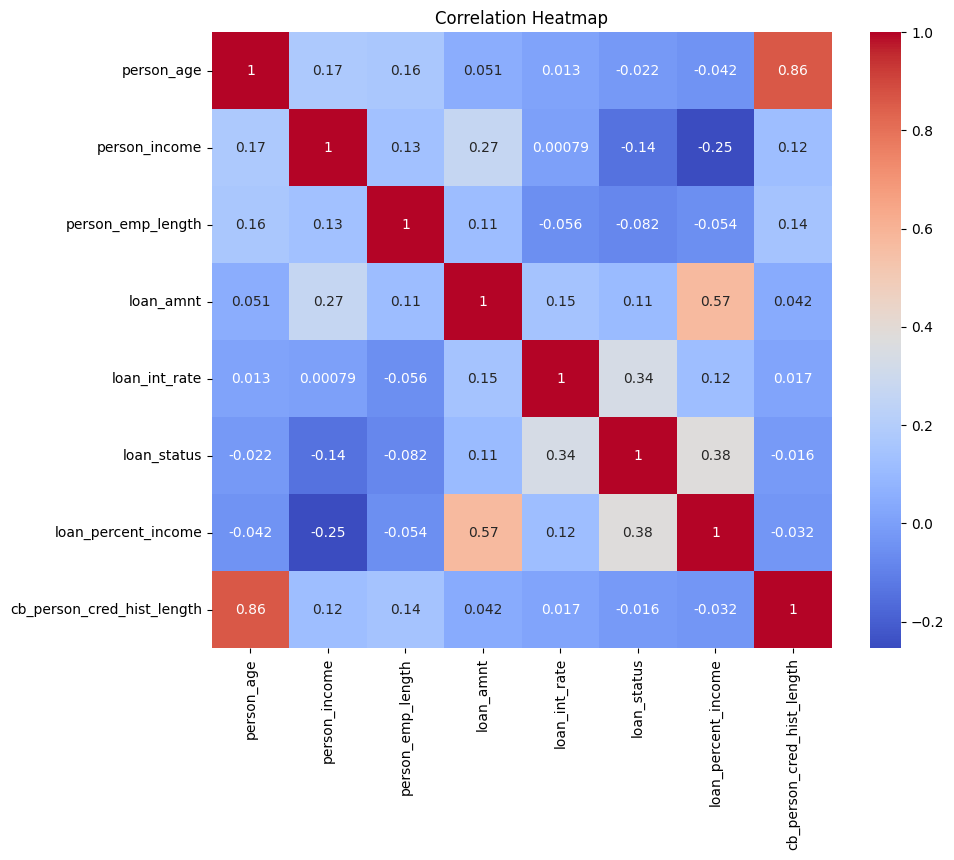

In [23]:
# Heatmap to check correlation among numerical variables

plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [24]:
# Categorical vs Categorical

In [25]:
cat_column.head()

,person_home_ownership,loan_intent,loan_grade,loan_status,cb_person_default_on_file
0,RENT,PERSONAL,D,1,Y
1,OWN,EDUCATION,B,0,N
2,MORTGAGE,MEDICAL,C,1,N
3,RENT,MEDICAL,C,1,N
4,RENT,MEDICAL,C,1,Y


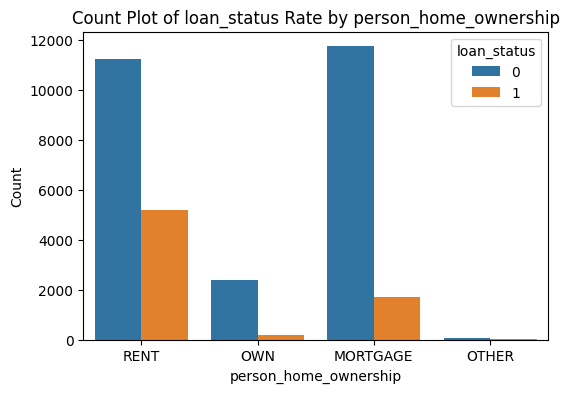

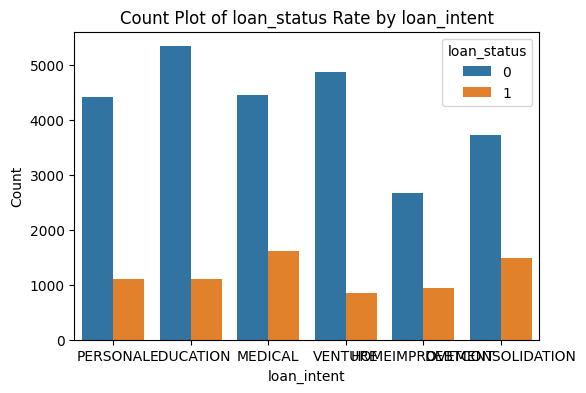

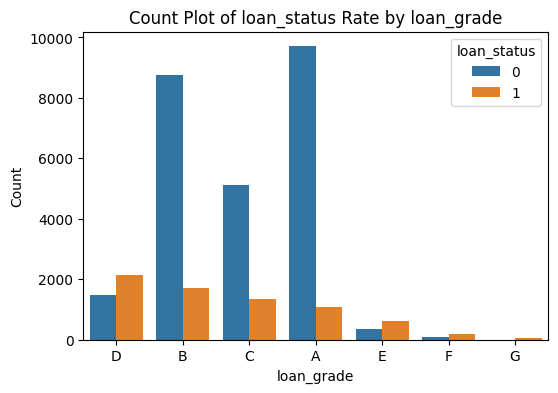

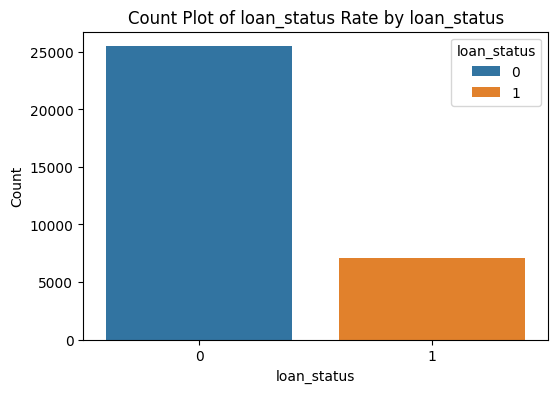

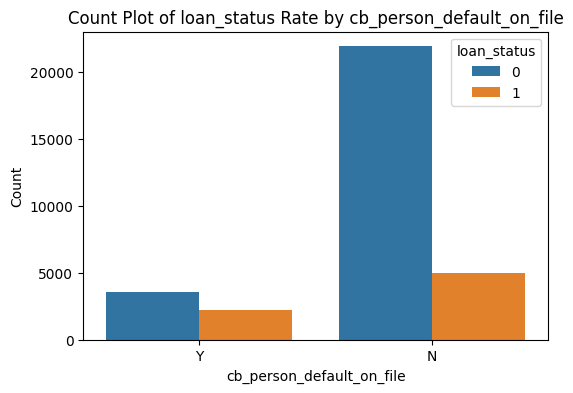

In [26]:
for col in cat_column:
  plt.figure(figsize=(6,4))
  sns.countplot(x=cat_column[col], hue=data['loan_status'])
  plt.title(f"Count Plot of loan_status Rate by {col}")
  plt.xlabel(f"{col}")
  plt.ylabel("Count")
  plt.show()

All above graphs shows count of categorical values wrt to Risk

# Feature Engineering

## Outlier removal

In [27]:
# Detecting and removing outlier using IQR method for all numerical column

for col in num_column:
  Q1= df[col].quantile(0.25)
  Q3= df[col].quantile(0.75)
  IQR= Q3-Q1
  lower_bound= Q1-1.5*IQR
  upper_bound= Q3+1.5*IQR
  df= df[(df[col]>=lower_bound) & (df[col]<=upper_bound)]


df.shape

(22995, 12)

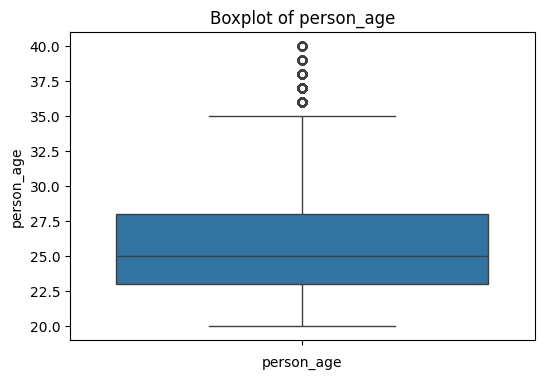

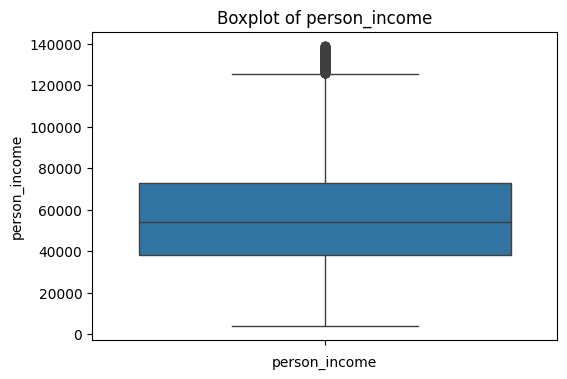

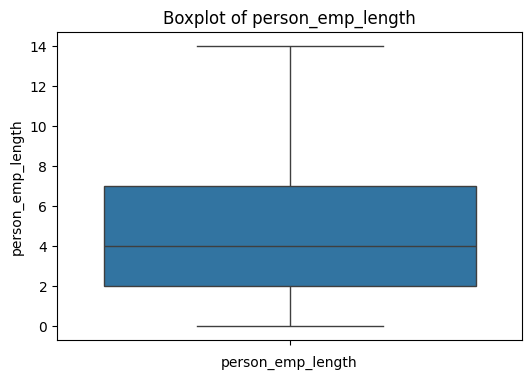

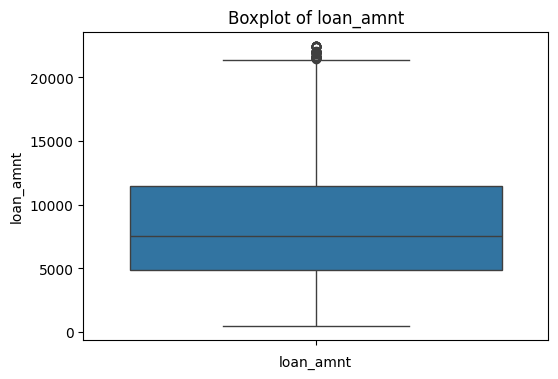

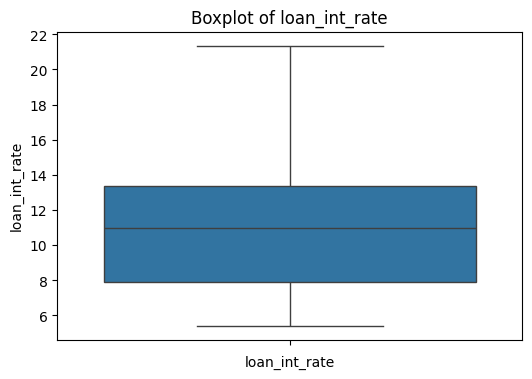

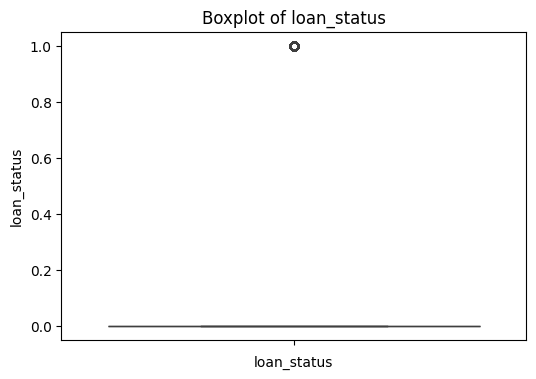

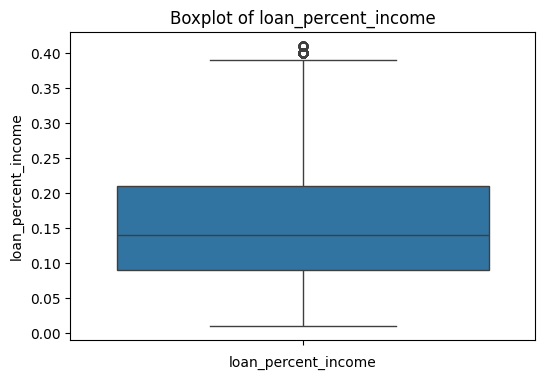

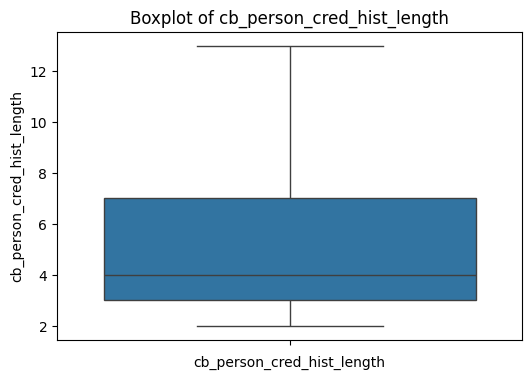

In [28]:

for col in df.select_dtypes(include='number'):
  plt.figure(figsize=(6,4))
  sns.boxplot(df[col])
  plt.title(f"Boxplot of {col}")
  plt.xlabel(f"{col}")


We can clearly see from BOXplot that all outliers are removed

## Handling missing values

In [29]:
df.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_status,0
loan_percent_income,0


**Observation**: After removing outliers, our null values also got removed

## Creating new column from existing

In [30]:
# Creating categorical column for age group out of numerical column so that our model works better
df['age_group'] = pd.cut(df['person_age'],
                           bins=[20, 26, 36, 46, 56, 66],
                           labels=['20-25', '26-35', '36-45', '46-55', '56-65'])

In [31]:
df['age_group'].dtype

CategoricalDtype(categories=['20-25', '26-35', '36-45', '46-55', '56-65'], ordered=True, categories_dtype=object)

In [32]:
# Creating cate column  income group out of numerical income

df['income_group'] = pd.cut(df['person_income'],
                              bins=[0, 25000, 50000, 75000, 100000, float('inf')],
                              labels=['low', 'low-middle', 'middle', 'high-middle', 'high'])

In [33]:
df['income_group']

,income_group
1,low
5,low
9,low
19,low
23,low
...,...
32243,middle
32245,high-middle
32248,low-middle
32256,middle


In [34]:
# Creating cat column loan amount out of numerical column

df['loan_amount_group'] = pd.cut(df['loan_amnt'],
                                   bins=[0, 5000, 10000, 15000, float('inf')],
                                   labels=['small', 'medium', 'large', 'very large'])

In [35]:
df['loan_amount_group'].dtype

CategoricalDtype(categories=['small', 'medium', 'large', 'very large'], ordered=True, categories_dtype=object)

In [36]:
df['loan_status']= df["loan_status"].astype('object')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22995 entries, 1 to 32293
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   person_age                  22995 non-null  int64   
 1   person_income               22995 non-null  int64   
 2   person_home_ownership       22995 non-null  object  
 3   person_emp_length           22995 non-null  float64 
 4   loan_intent                 22995 non-null  object  
 5   loan_grade                  22995 non-null  object  
 6   loan_amnt                   22995 non-null  int64   
 7   loan_int_rate               22995 non-null  float64 
 8   loan_status                 22995 non-null  object  
 9   loan_percent_income         22995 non-null  float64 
 10  cb_person_default_on_file   22995 non-null  object  
 11  cb_person_cred_hist_length  22995 non-null  int64   
 12  age_group                   22984 non-null  category
 13  income_group         

## Train-test split

In [38]:
X = df.drop(['loan_status'], axis=1)
Y = df['loan_status']

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [40]:
print(x_train.shape,x_test.shape)

(18396, 14) (4599, 14)


In [41]:
x_train.reset_index(inplace = True)
x_test.reset_index(inplace = True)

In [42]:
x_train.head()

,index,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group,income_group,loan_amount_group
0,8402,22,57600,MORTGAGE,1.0,PERSONAL,B,6000,10.00,0.10,N,2,20-25,middle,medium
1,9736,23,28000,RENT,0.0,EDUCATION,A,8700,6.03,0.31,N,2,20-25,low-middle,medium
2,3590,23,65000,RENT,2.0,DEBTCONSOLIDATION,B,3600,11.49,0.06,N,2,20-25,middle,small
3,8524,25,58000,MORTGAGE,5.0,EDUCATION,A,3150,6.17,0.05,N,4,20-25,middle,small
4,21549,29,31200,RENT,2.0,PERSONAL,B,6000,11.46,0.19,N,10,26-35,low-middle,medium


In [43]:
x_train.drop(['index'], axis=1, inplace=True)
x_test.drop(['index'], axis=1, inplace=True)

## Encoding

In [44]:
# One-hot encoding
from sklearn.preprocessing import OneHotEncoder

# Identify categorical columns
categorical_cols = x_train.select_dtypes(include=['object','category']).columns

# Initialize OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Fit & Transform on training data
X_train_encoded = encoder.fit_transform(x_train[categorical_cols])

# Transform test data using the same encoder
X_test_encoded = encoder.transform(x_test[categorical_cols])

# Convert to DataFrame with proper column names
X_train_encoded = pd.DataFrame(X_train_encoded,columns=encoder.get_feature_names_out(categorical_cols))
X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Drop original categorical columns and merge with encoded data
X_train_final = x_train.drop(columns=categorical_cols).reset_index(drop=True)
X_test_final = x_test.drop(columns=categorical_cols).reset_index(drop=True)

X_train_final = pd.concat([X_train_final, X_train_encoded], axis=1)
X_test_final = pd.concat([X_test_final, X_test_encoded], axis=1)

# Display final processed data
print("Final X_train shape:", X_train_final.shape)
print("Final X_test shape:", X_test_final.shape)
X_train_final.head()


Final X_train shape: (18396, 32)
Final X_test shape: (4599, 32)


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,...,age_group_26-35,age_group_36-45,age_group_nan,income_group_high-middle,income_group_low,income_group_low-middle,income_group_middle,loan_amount_group_medium,loan_amount_group_small,loan_amount_group_very large
0,22,57600,1.0,6000,10.00,0.10,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,23,28000,0.0,8700,6.03,0.31,2,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,23,65000,2.0,3600,11.49,0.06,2,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,25,58000,5.0,3150,6.17,0.05,4,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,29,31200,2.0,6000,11.46,0.19,10,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


**NOTE:** We are not going to standardized the data because we are going to use Decision Tree and Random forest ML model

# Handling Imbalanced Data set using SMOTE

In [45]:
y_train.value_counts()

,count
loan_status,
0,14670
1,3726


In [46]:
y_train.value_counts()/y_train.shape[0]*100

,count
loan_status,
0,79.745597
1,20.254403


In [47]:
y_train=y_train.astype('int')
y_test=y_test.astype('int')

In [48]:
X_train_final=X_train_final.astype('int')
X_test_final=X_test_final.astype('int')

We can see that Data is highly imbalanced hence we will apply smote technique in order to avoid overfitting

In [49]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_final, y_train)

# Check Class Distribution Before & After
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_balanced.value_counts())

Before SMOTE: loan_status
0    14670
1     3726
Name: count, dtype: int64
After SMOTE: loan_status
0    14670
1    14670
Name: count, dtype: int64


# Model Building

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, f1_score

In [51]:
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

## Hyperparameter Tuning

In [52]:
# Define hyperparameter grid for Decision Tree
param_grid_dt = {
    'criterion': ['gini', 'entropy'],  # Splitting criteria
    'max_depth': [3, 5, 10, None],  # Depth of tree
    'min_samples_split': [2, 5, 10],  # Minimum samples per split
    'min_samples_leaf': [1, 2, 4]  # Minimum samples per leaf
}

# Apply Grid Search with Cross-Validation
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_dt.fit(X_train_balanced, y_train_balanced)

# Best Parameters and Best Score
print("Best Hyperparameters for Decision Tree:", grid_search_dt.best_params_)
print("Best Accuracy for Decision Tree:", grid_search_dt.best_score_)

# Train final Decision Tree model using best parameters
best_dt_model = grid_search_dt.best_estimator_

test_score = best_dt_model.score(X_test_final, y_test)
print("Test Accuracy:", test_score)


Best Hyperparameters for Decision Tree: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best Accuracy for Decision Tree: 0.9005112474437628
Test Accuracy: 0.878234398782344


In [53]:
# Define hyperparameter grid for random forest
param_grid = {
    'n_estimators': [50, 100, 200],          # Number of trees
    'max_depth': [10, 20, None],             # Maximum depth of tree
    'min_samples_split': [2, 5, 10],         # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],           # Minimum samples at a leaf node
    'max_features': ['sqrt', 'log2', None],  # Number of features per split
    'bootstrap': [True, False]               # Use bootstrapping or not
}


# Grid Search with Cross-Validation (cv=5 means 5-fold cross-validation)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_balanced, y_train_balanced)

# Get best hyperparameters
print("Best parameters:", grid_search.best_params_)

# Train final model with best parameters
best_model = grid_search.best_estimator_
print("Best Accuracy for Random Forest:", grid_search.best_score_)

# Evaluate on test set
test_score = best_model.score(X_test_final, y_test)
print("Test Accuracy:", test_score)


Best parameters: {'bootstrap': True, 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy for Random Forest: 0.9328902522154057
Test Accuracy: 0.9191128506196999


## Prediction

In [54]:
y_pred_dt= best_dt_model.predict(X_test_final) # Using Decision Tree
y_prob_dt = best_dt_model.predict_proba(X_test_final)[:, 1] # for roc curve



In [55]:
y_pred_rf= best_model.predict(X_test_final) # Using Random Forest
y_prob_rf = best_model.predict_proba(X_test_final)[:, 1] #For roc curve

## Computing Classification report, F1-Score etc

In [56]:
# Decision Tree Metrics
print("🔹 Decision Tree Metrics:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
print("F1-score:", f1_score(y_test, y_pred_dt))
print("precision", precision_score(y_test, y_pred_dt))
print("recall", recall_score(y_test, y_pred_dt))
print("accuracy", accuracy_score(y_test, y_pred_dt))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_dt))




🔹 Decision Tree Metrics:
Confusion Matrix:
 [[3408  292]
 [ 268  631]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.92      3700
           1       0.68      0.70      0.69       899

    accuracy                           0.88      4599
   macro avg       0.81      0.81      0.81      4599
weighted avg       0.88      0.88      0.88      4599

F1-score: 0.6926454445664105
precision 0.6836403033586133
recall 0.7018909899888766
accuracy 0.878234398782344
ROC-AUC Score: 0.8279910110332802


In [59]:
# Random Forest Metrics
print("\n🔹 Random Forest Metrics:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))
print("precision", precision_score(y_test, y_pred_rf))
print("recall", recall_score(y_test, y_pred_rf))
print("accuracy", accuracy_score(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_rf))


🔹 Random Forest Metrics:
Confusion Matrix:
 [[3591  109]
 [ 263  636]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      3700
           1       0.85      0.71      0.77       899

    accuracy                           0.92      4599
   macro avg       0.89      0.84      0.86      4599
weighted avg       0.92      0.92      0.92      4599

F1-score: 0.7737226277372263
precision 0.8536912751677852
recall 0.7074527252502781
accuracy 0.9191128506196999
ROC-AUC Score: 0.9080577518564172


### **Final Conclusion: Decision Tree vs. Random Forest Model for Credit Risk Prediction**  

After training and evaluating **Decision Tree (DT) and Random Forest (RF)** models on the credit risk dataset, we summarize their performance based on key classification metrics.

Here’s a tabular comparison of the two models based on their evaluation metrics:

| Metric       | Random Forest (Higher Accuracy) | Decision Tree (Lower Accuracy) |
|-------------|-------------------------|-------------------------|
| **Accuracy** | 0.9191                  | 0.8782                  |
| **Precision** | 0.8537                  | 0.6836                  |
| **Recall**   | 0.7075                  | 0.7019                  |
| **F1-score** | 0.7737                  | 0.6926                  |
| **ROC-AUC**  | 0.9081                  | 0.8280                  |




---

### **Key Observations**  
1. **Random Forest Outperforms Decision Tree**:  
   - Random Forest generally provides better accuracy, recall, and ROC-AUC compared to a single Decision Tree.  
   - This is due to **ensemble learning**, which reduces overfitting and improves generalization.  

2. **Decision Tree is Simpler but Prone to Overfitting**:  
   - While DT may provide a reasonable performance, it tends to overfit the training data.  
   - It is more interpretable but lacks the robustness of RF.  

3. **Random Forest Handles Imbalanced Data Better**:  
   - If class imbalance exists, **Random Forest** tends to perform better in terms of **recall and F1-score**.  
   - However, additional techniques like **SMOTE (Synthetic Minority Over-sampling Technique)** can further improve both models.  

---

### **Final Recommendation**
 - **If interpretability is a priority**, **Decision Tree** is preferable.  
 - **If accuracy, robustness, and generalization are priorities**, **Random Forest** is the better model.  


---

